In [1]:
df=pd.read_csv(r"C:\Users\91987\Desktop\Data Train\Dynamic Project\Heart Disease/heartdisease_data.csv",header=None)

<IPython.core.display.Javascript object>

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [3]:
# as we can see that there are no column headings present in the dataset, but those are have been mentioned in the 
# problem statement. So we are assigning column headings from the problem satetments.
df.columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [5]:
df.isnull().sum()

# as we can see that there are ? in datasets which are being present as missing values, but pandas is not considering them as
# missing values so we have to replace them with nan values and then treat them.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [6]:
df.replace('?', np.NaN,inplace=True)

<IPython.core.display.Javascript object>

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

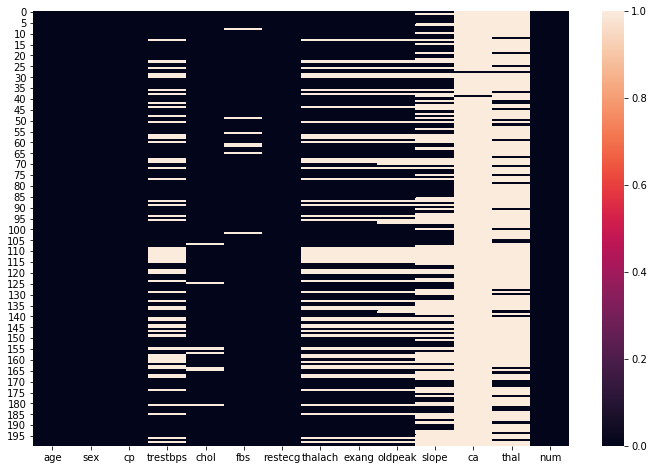

In [8]:
# Visualising Null values
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())
plt.show()

In [9]:
# now cheching null values
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [10]:
df.shape

(200, 14)

In [11]:
# Cheching the percent of null values of each columns with respect to dataset.

for i in df.columns:
    if df[i].isnull().sum() > 0:
        print("Percent of null values in column {0} is   ---- {1} " .format(i,((df[i].isnull().sum())/200)*100))        

Percent of null values in column trestbps is   ---- 28.000000000000004 
Percent of null values in column chol is   ---- 3.5000000000000004 
Percent of null values in column fbs is   ---- 3.5000000000000004 
Percent of null values in column thalach is   ---- 26.5 
Percent of null values in column exang is   ---- 26.5 
Percent of null values in column oldpeak is   ---- 28.000000000000004 
Percent of null values in column slope is   ---- 51.0 
Percent of null values in column ca is   ---- 99.0 
Percent of null values in column thal is   ---- 83.0 


In [12]:
# As we can see there are many columns where more that 50% of data is missing so we can drop them column
# i.e. we are droppinf column slope , ca, thal

df.drop(['slope','ca',"thal"],axis=1,inplace=True)

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140,260,0,1,112,1,3,2
1,44,1,4,130,209,0,1,127,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,2
3,55,1,4,142,228,0,1,149,1,2.5,1
4,66,1,3,110,213,1,2,99,1,1.3,0


In [14]:
df.shape

(200, 11)

In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'num'],
      dtype='object')

In [18]:
# as we can not find any relation for the missing values or any group between the columns, so we are replacing missing values 
# of all the columns with mean of their espective columns

for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        mean_val=pd.to_numeric(df[i], errors='coerce').mean()
        print(mean_val)
        #df[i]=df[i].fillna(value=mean_val,inplace=True)
        df[i]=df[i].fillna(value=mean_val,inplace=True)

In [17]:
# # # As I was not able to find mean directly using df.mean()

# old_m=pd.to_numeric(df['oldpeak'], errors='coerce').mean()
# old_m

<IPython.core.display.Javascript object>

1.3208333333333333

In [18]:
# df["oldpeak"]=df["oldpeak"].fillna(value=old_m)

In [20]:
df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140,260,0,1,112,1,3,2
1,44,1,4,130,209,0,1,127,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,2
3,55,1,4,142,228,0,1,149,1,2.5,1
4,66,1,3,110,213,1,2,99,1,1.3,0
5,66,1,3,120,0,0,1,120,0,-0.5,0
6,65,1,4,150,236,1,1,105,1,0,3
7,60,1,3,180,0,0,1,140,1,1.5,0
8,60,1,3,120,0,0.352332,0,141,1,2,3
9,60,1,2,160,267,1,1,157,0,0.5,1


In [23]:
#Now we have treated all the null values in our dataset

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
dtype: int64

In [24]:
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.511363
chol       -0.571879
fbs         0.634130
restecg     0.391463
thalach     0.148515
exang      -0.719015
oldpeak     0.423414
num         0.297393
dtype: float64

In [25]:
df.info()
# We can see that many columns are still being treated as object so now we have to convert them to int.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  num       200 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 17.3+ KB


In [26]:
for i in df.columns:
    if df[i].dtype == object:
        print(i)
        df[i]=df[i].astype('float')

trestbps
chol
fbs
thalach
exang
oldpeak


In [27]:
# Again checking type of features in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    float64
 4   chol      200 non-null    float64
 5   fbs       200 non-null    float64
 6   restecg   200 non-null    int64  
 7   thalach   200 non-null    float64
 8   exang     200 non-null    float64
 9   oldpeak   200 non-null    float64
 10  num       200 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 17.3 KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

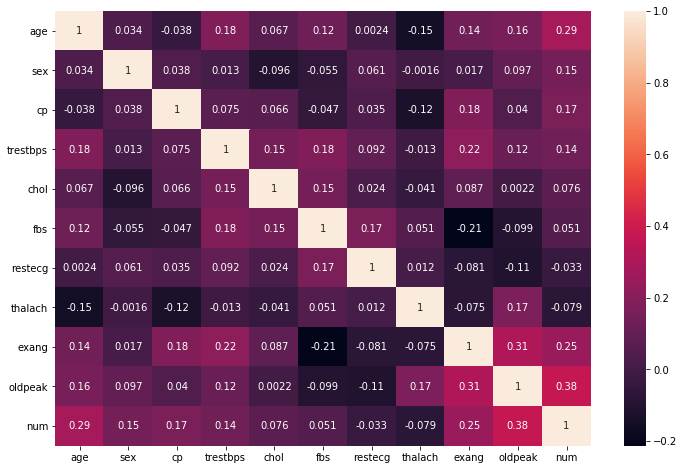

In [28]:
# Now Cheching correlation in our datsset
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    int64  
 4   chol      200 non-null    int64  
 5   fbs       200 non-null    int64  
 6   restecg   200 non-null    int64  
 7   thalach   200 non-null    int64  
 8   exang     200 non-null    int64  
 9   oldpeak   200 non-null    float64
 10  num       200 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 17.3 KB


In [29]:
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.511363
chol       -0.571879
fbs         0.634130
restecg     0.391463
thalach     0.148515
exang      -0.719015
oldpeak     0.423414
num         0.297393
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A552A952C8>,
      dtype=object)

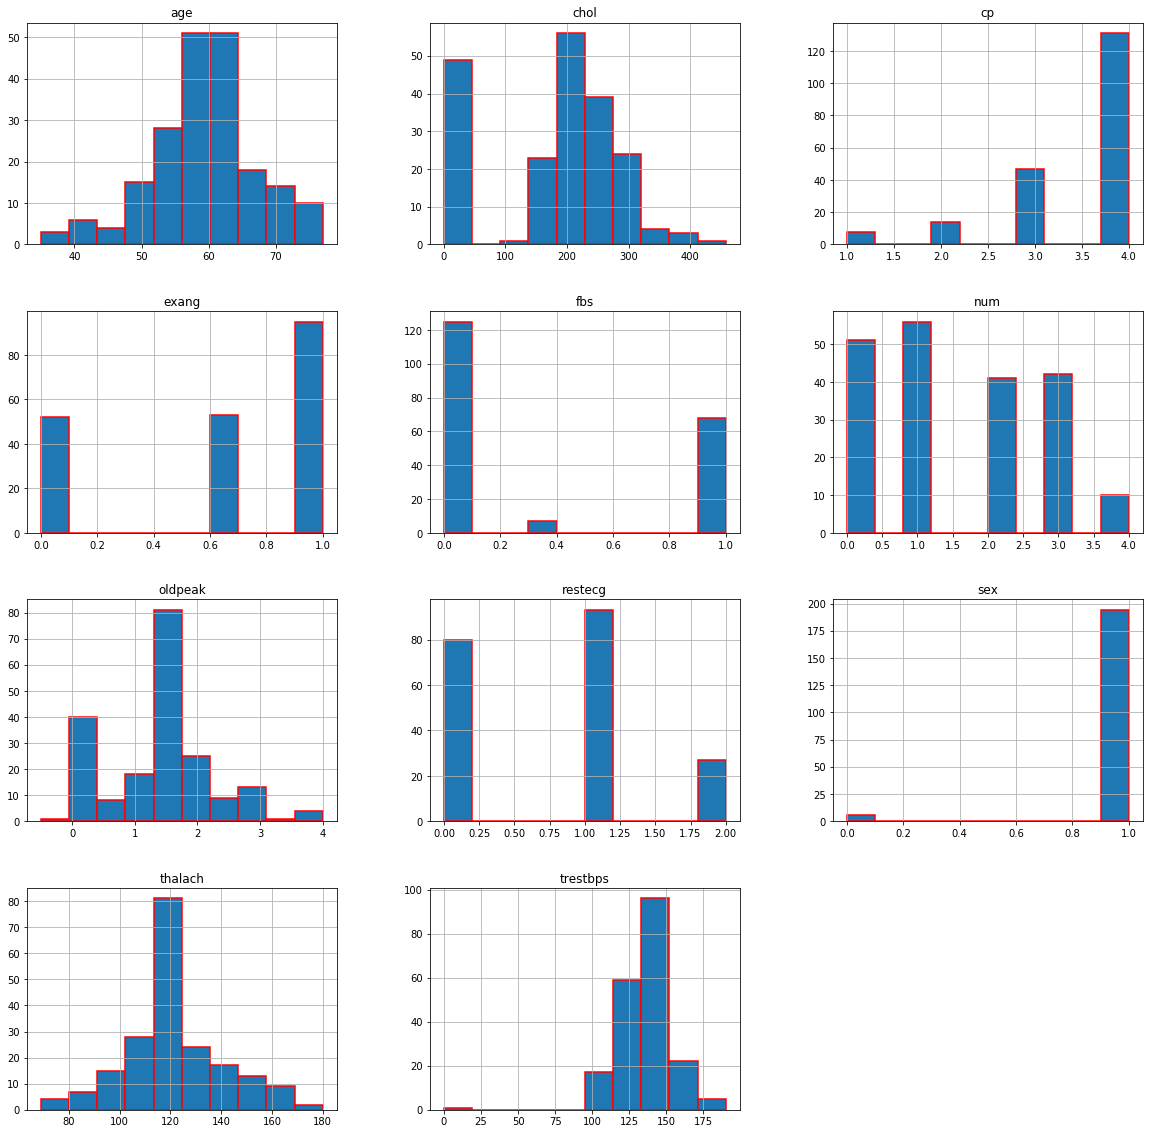

In [30]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

### Applying Machine Learning

In [94]:
x=df.drop(['num'],axis=1)

In [95]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3


In [96]:
y=df['num']

In [97]:
y.head()

0    2
1    0
2    2
3    1
4    0
Name: num, dtype: int64

__As We can see that there is skewness is data which needs to be treated before performing ML operations__

In [98]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

### Model Building

In [99]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [101]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [102]:
max_cv=0
for i in range(0,100,2):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random State - ",i,"model is performing good")
        print("Traing Accuracy sore is - ",accuracy_score(y_train,pred_train)*100)
        print("Testing Accuracy sore is - ",accuracy_score(y_test,pred_test)*100)

At random State -  46 model is performing good
Traing Accuracy sore is -  42.5
Testing Accuracy sore is -  42.5


In [103]:
import warnings
warnings.simplefilter("ignore")

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,random_state=46,test_size=0.20)

In [105]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
lr.score(x_test,y_test)

0.425

### Using Decission tree

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [108]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [109]:
dt.score(x_test,y_test)

0.475

In [110]:
grid_param={'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']}

In [111]:
grid_search= GridSearchCV(dt,param_grid=grid_param,cv=5)

In [112]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [113]:
best_param = grid_search.best_params_
print(best_param)

{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'}


In [114]:
dtn= DecisionTreeClassifier(criterion='gini',max_depth=18,min_samples_leaf=1,min_samples_split=4,splitter='random')
dtn.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=18, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [115]:
dtn.score(x_test,y_test)

0.325

### Using Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=6)

In [117]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [118]:
rf.score(x_test,y_test)

0.4

In [120]:
param_grid ={'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,2),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1)
}

In [121]:
grid_searchrf = GridSearchCV(rf,param_grid=param_grid,cv=4)

In [122]:
grid_searchrf.fit(x_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=6,
                                   

In [123]:
best_param= grid_searchrf.best_params_
print(best_param)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 7}


In [124]:
rfn=RandomForestClassifier(criterion='entropy',max_depth=8,min_samples_leaf=3,min_samples_split=7)
rfn.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [125]:
rfn.score(x_test,y_test)

0.475

### SVM

In [132]:
from sklearn.svm import SVC
sv=SVC()

In [133]:
sv.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [134]:
sv.score(x_test,y_test)

0.375

In [145]:
param_grid ={'kernel': ['poly', 'rbf', 'sigmoid'],
    'C' : [50, 10, 1.0, 0.1, 0.01],
    'gamma' : ['scale']
}

In [138]:
grid_searchsv = GridSearchCV(sv, param_grid=param_grid)

In [139]:
grid_searchsv.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [140]:
best_param= grid_searchsv.best_params_
print(best_param)

{'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [142]:
svcn=SVC(kernel='sigmoid',gamma='scale',C=50)
svcn.fit(x_train,y_train)

SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [143]:
svcn.score(x_test,y_test)

0.275

__For every algortihm We are recieving very less score even after parameter optimisation and treating skewness.__
__Random Forest is giving best accuracy among these models so we will be using it for our prediction.__ 

In [146]:
import pickle
with open('Heart Disease.sav','wb') as f:
    pickle.dump(rfn,f)